In [1]:
from pathlib import Path
import os

import numpy as np
import matplotlib.pyplot as plt

In [3]:
pckg_pth = Path('C:/Users/CNB968/OneDrive - MT/GitHub/indirectQ/src')
examples_pth = Path('.')
os.chdir(pckg_pth)

import indirectQ as iq
from indirectQ import utilities

In [4]:
topo_pth = Path("../sample_data/topo_raster/WFRC_lidar_20cm_EPSG32100.tif")
d_xsec_pth = Path("../sample_data/channel_shapefiles/WFRC_SAxsections_EPSG32100.shp")
chan_cnt_pth = Path("../sample_data/channel_shapefiles/WFRC_Chan_Centerline_EPSG32100.shp")
ws_pth = Path("../sample_data/HWM_points/West_Fork_Rock_Cr_20220628HWMs_EPSG32100.csv")
man_reg = Path("../sample_data/channel_shapefiles/Mannings_N_Regions.shp")

In [5]:
channel = iq.LoadSurvey(chan_cnt_pth, ws_pth, ws_x='X', ws_y='Y', ws_crs="EPSG:6515", topo_pth=topo_pth)

In [6]:
channel.extractXsections(d_xsec_pth)
channel.assign_wse()

In [11]:
channel.extracted_xsections

{'0': {'lineID': 0,
  'Line': <LINESTRING (2009608.647 328322.667, 2009720.27 328376.91)>,
  'Points':      Dwnstrm_Distance                        geometry        value
  0            0.000000  POINT (2009608.647 328322.667)  6472.982972
  1            1.000000  POINT (2009609.547 328323.104)  6472.864426
  2            2.000000  POINT (2009610.446 328323.541)  6472.638949
  3            3.000000  POINT (2009611.346 328323.978)  6472.285313
  4            4.000000  POINT (2009612.245 328324.415)  6471.986545
  ..                ...                             ...          ...
  121        121.000000  POINT (2009717.478 328375.553)  6473.019818
  122        122.000000   POINT (2009718.377 328375.99)  6473.796774
  123        123.000000  POINT (2009719.277 328376.427)  6474.949394
  124        124.000000  POINT (2009720.176 328376.865)  6475.327459
  125        124.104364    POINT (2009720.27 328376.91)  6475.179677
  
  [126 rows x 3 columns],
  'Channel Rank': 1,
  'Xsec_Cntrln_Dist':

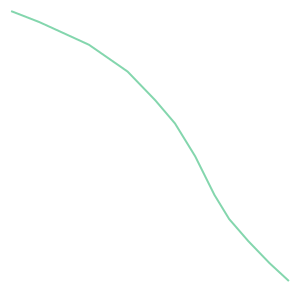

In [14]:
channel.channel_centerline['0']['Line']

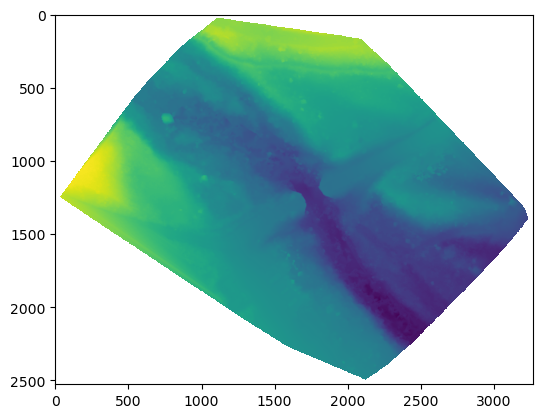

In [16]:
nantopo = np.where(channel.terrain[2] < 0, np.nan, channel.terrain[2])
plt.imshow(nantopo)

In [31]:
channel.extracted_xsections['2']

{'lineID': 2,
 'Line': <LINESTRING (2009523.778 328405.269, 2009601.173 328471.71)>,
 'Points':      Dwnstrm_Distance                        geometry        value
 0            0.000000  POINT (2009523.778 328405.269)  6478.561441
 1            1.000000   POINT (2009524.537 328405.92)  6478.368003
 2            2.000000  POINT (2009525.296 328406.572)  6478.542218
 3            3.000000  POINT (2009526.055 328407.223)  6478.412858
 4            4.000000  POINT (2009526.813 328407.874)  6478.480942
 ..                ...                             ...          ...
 99          99.000000  POINT (2009598.895 328469.755)  6478.629926
 100        100.000000  POINT (2009599.654 328470.406)  6478.907067
 101        101.000000  POINT (2009600.413 328471.057)  6479.545453
 102        102.000000  POINT (2009601.172 328471.709)  6480.384086
 103        102.001709   POINT (2009601.173 328471.71)  6480.384086
 
 [104 rows x 3 columns],
 'Channel Rank': 3,
 'Xsec_Cntrln_Dist': 156.0715310072682}

In [20]:
import numpy as np
channel.terrain[2]
nt = np.where(channel.terrain[2] < 0, np.nan, channel.terrain[2])

In [25]:
channel.channel_centerline['0']['Points']

,Dwnstrm_Distance,geometry,value
0,0.000000,POINT (2009433.723 328519.526),6478.223425
1,1.000000,POINT (2009434.655 328519.164),6477.879802
2,2.000000,POINT (2009435.587 328518.801),6477.652722
3,3.000000,POINT (2009436.519 328518.438),6477.653924
4,4.000000,POINT (2009437.451 328518.075),6477.656327
...,...,...,...
417,417.000000,POINT (2009724.383 328236.938),6460.817993
418,418.000000,POINT (2009725.118 328236.26),6460.963772
419,419.000000,POINT (2009725.853 328235.582),6461.364266
420,420.000000,POINT (2009726.588 328234.904),6461.682658


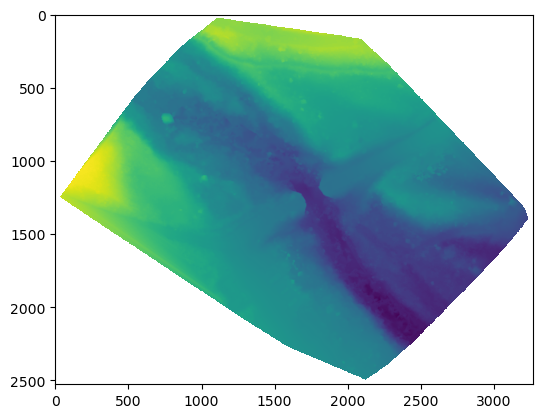

In [22]:
import matplotlib.pyplot as plt
plt.imshow(nt)